# Comments Data Report  
**Name:** Aubrey Nighman  
**Date:** September 11, 2025  

### Reflection Questions  

**Source of Instagram data**  
The source of this data is Instagram. I didn't create the posts, but I did create the comments that show up in this data.  

**Reasoning for Data Being Created - Purposes the Data can Serve**  
This data was created as part of Instagram’s records to keep and to track comments made on posts. The purpose is to document my activity and interactions, and it can show patterns in who I am engaging with the most.  

**Reliability**  
This data is reliable because it comes directly from Instagram and has the actual text of my comments, the account that owned the post, and accurate timestamps.  

**Unreliability**  
The data may be unreliable because it only includes comments I made, not all comments on the posts. It also lacks the context of the entire post, and may not have deleted comments or interactions outside of my commenting.  


## Hypothesis Test with Another Dataset

In Part 1 of this report, I looked at the data in my `liked_posts.json` file and summarized the number of likes by account.  
For Part 2, I will choose a different dataset from my Instagram archive in order to test a hypothesis.  

I selected the file `post_comments_1.json` because it contains the comments I made on other users’ posts.  
This dataset will allow me to test the hypothesis that frequent commenting indicates closer social connections.  


In [1]:
import pandas as pd
import json

# Load the comments data
with open("post_comments_1.json") as f:
    data = json.load(f)

# Convert JSON into a tidy DataFrame
records = []
for entry in data:
    comment = entry["string_map_data"]["Comment"]["value"]
    owner = entry["string_map_data"]["Media Owner"]["value"]
    timestamp = entry["string_map_data"]["Time"]["timestamp"]
    records.append({"comment": comment, "media_owner": owner, "timestamp": timestamp})

df_comments = pd.DataFrame(records)

# Convert timestamps to readable datetime
df_comments["timestamp"] = pd.to_datetime(df_comments["timestamp"], unit="s", errors="coerce")

df_comments.head(10)


,comment,media_owner,timestamp
0,OMG YESSS CASSSS CONGRATS ð,casperdickey,2025-08-20 00:05:12
1,yeah youâre so gorgeous,sarahlekan__,2025-08-14 21:55:48
2,bhaddie shot o clock,jaxcarleton_,2025-07-30 01:04:03
3,@guyhansen_ âºï¸âºï¸,aubreynighman_,2025-07-18 00:48:31
4,@jimnighman thanks dad â¤ï¸â¤ï¸,aubreynighman_,2025-07-10 22:41:00
5,@guyhansen_ ððpartayyy,aubreynighman_,2025-07-10 00:40:35
6,@sarahlekan__ thatâs all u babes but i love ...,aubreynighman_,2025-07-10 00:40:22
7,@amberr.alice you gotta come next year!!,aubreynighman_,2025-07-10 00:40:07
8,youâre so gorgeous,girliegrl70,2025-06-22 03:24:12
9,DAYUM MAWMAW,ionna_bank,2025-06-22 01:17:28


### DataFrame Preview

The DataFrame contains three columns:  
- **comment** → the text of the comment I made  
- **media_owner** → the account whose post I commented on  
- **timestamp** → the date and time when I made the comment  

This structure follows tidy data principles because each row is one comment/observation, and each column represents one variable in the data records. 


In [2]:
# Count number of comments per account
comment_summary = df_comments.groupby("media_owner")["comment"].count()
comment_summary


media_owner
aubreynighman_        8
bennicholsvisuals     3
casperdickey          1
coleslaw_5000         1
gannonhollar          1
girliegrl70           5
guyhansen_            3
ionna_bank            1
jaxcarleton_          1
madisongshannon       1
may.rawson14          1
mrbeast               1
ohiovintagefest       4
samanthagracesongs    1
sarahlekan__          7
sophie_mae286         2
walshjwsoccer         1
Name: comment, dtype: int64

### Comment Summary

The table above shows how many comments I made on each account’s posts. This summary allows me to see which accounts I engage with the most through commenting activity.  

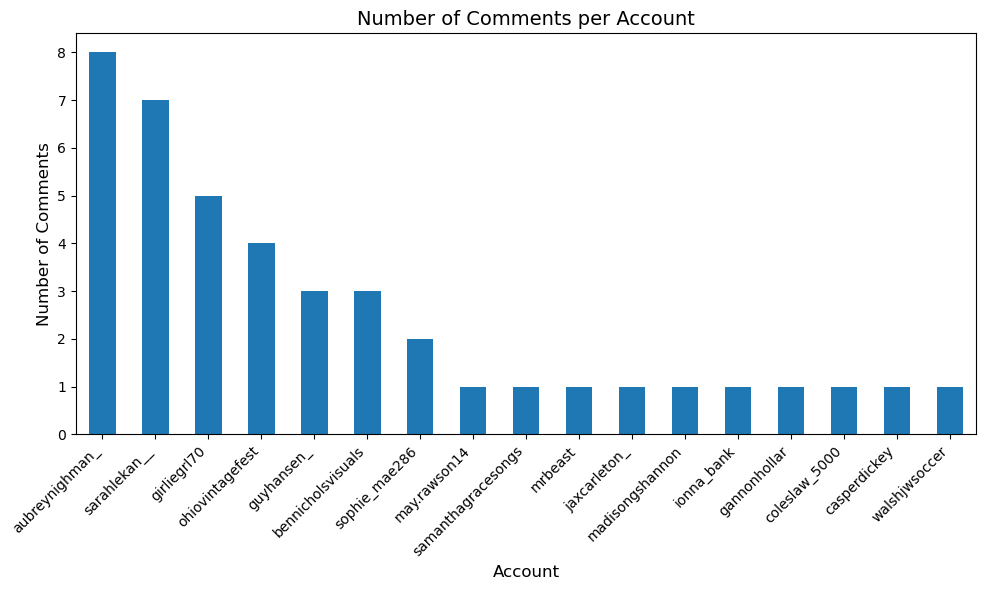

In [3]:
import matplotlib.pyplot as plt

# Bar chart of comments per account
plt.figure(figsize=(10,6))
comment_summary.sort_values(ascending=False).plot(kind="bar")

plt.title("Number of Comments per Account", fontsize=14)
plt.xlabel("Account", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


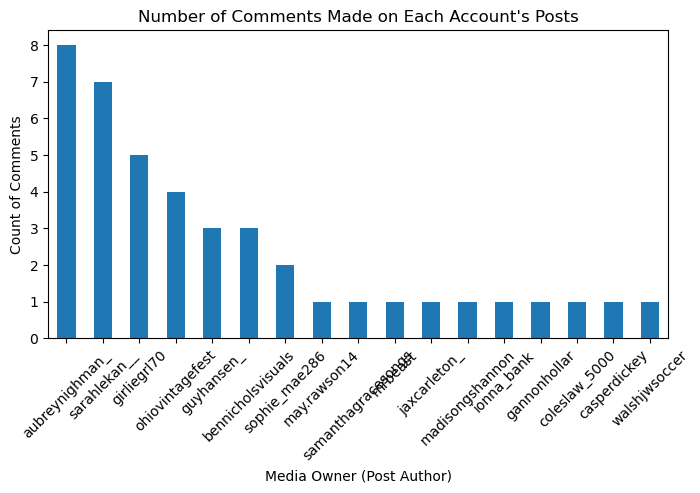

In [4]:
import matplotlib.pyplot as plt

# Bar chart of number of comments per media owner
comment_summary.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))

plt.title("Number of Comments Made on Each Account's Posts")
plt.xlabel("Media Owner (Post Author)")
plt.ylabel("Count of Comments")
plt.xticks(rotation=45)
plt.show()



### Hypothesis  

**Hypothesis Statement:**  
If I comment frequently on someone’s posts, it suggests I am closer socially with them. When certain accounts receive more of my comments, it reflects stronger engagement and relational ties. Frequent commenting is often a sign of familiarity and more frequent interaction. 
**Theoretical Elements:**  
People are more likely to engage repeatedly with those they have stronger relationships with. Both online and offline. In this case, the accounts that I comment on most often, reflect close friendships, family, or frequent online interaction.  

**Statistical Elements:**  
The hypothesis could be tested by comparing the number of times my comments show up different accounts. With the comments dataset, I can analyze which accounts appear most often and how many comments I have written. A concentration of comments on a few accounts would statistically support the idea that commenting activity reflects stronger social connections.  



### Reflection on DataFrame  

The DataFrame represents Instagram comments I have made on posts. Each row is one comment, with columns for the comment text, the media owner (the account whose post I commented on), and the timestamp.  

The DataFrame is tidy because each column represents a variable and each row is a single observation.  

This data can be used to test my hypothesis, but only in part. Since the dataset only includes the comments I made, it does not show whether those accounts also engage with me or the context of the full comment section of that post. Even with that, I can still analyze which accounts I comment on most frequently to see patterns in my engagement.  

**Limitations:**  
- Only includes my comments, not full conversations under posts.    
- Deleted or missing comments may not appear.  

Despite these limitations, the data gives insight into which accounts I interact with most often through comments and helps highlight patterns socially on Instagram.  

